# Crack Classification CNN Model Test

Simple notebook to test CNN model behaviour.

In [12]:
import numpy
import cv2
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import numpy as np
import sys
import random

## CNN Detector class definition

In [13]:
class CNNDetector:      
    def __init__(self, checkpoint_file, input_shape=(64,64) ):        
        self.input_shape = input_shape
        self.model = load_model(checkpoint_file)        
        
    def predict_image_file(self, filename):        
        img = cv2.imread(filename)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img,(int(self.input_shape[0]),int(self.input_shape[1]))) 
        img_converted = img.reshape(1,64,64,3)
        return self.model.predict(img_converted)

## Utility functions

In [14]:
def pick_random_files(n_files, path, class_names):
    image_files = []
    for name in class_names:
        tmp=os.listdir(path+name)
        for i in range(int(n_files/len(class_names))):
            image_files.append(path+name+"/"+random.choice(tmp))
    random.shuffle(image_files)
    return image_files

## CNN Model test

In [15]:
# Test set
WORSKPACE_BASE_PATH = "/tf/notebooks/"
IMG_PATH=WORSKPACE_BASE_PATH+"data/datasets/cracks_splitted8020/test_set/"
N_TEST_IMAGES = 16
CLASS_NAMES = ["Negative","Positive"]

# Model configuration :: SimpleNet
CHECKPOINT_FILE = WORSKPACE_BASE_PATH+"model-checkpoints/"+"simplenet_cracks8020_weights.01-0.04.hdf5"
INPUT_IMAGE_WIDTH=64
INPUT_IMAGE_HEIGHT=64

In [16]:
cnn = CNNDetector(CHECKPOINT_FILE)

In [17]:
image_files = pick_random_files(N_TEST_IMAGES, IMG_PATH,CLASS_NAMES )

Test a single prediction

In [18]:
prediction = cnn.predict_image_file(image_files[0])

In [19]:
prediction

array([[1., 0.]], dtype=float32)

### Random images from test set

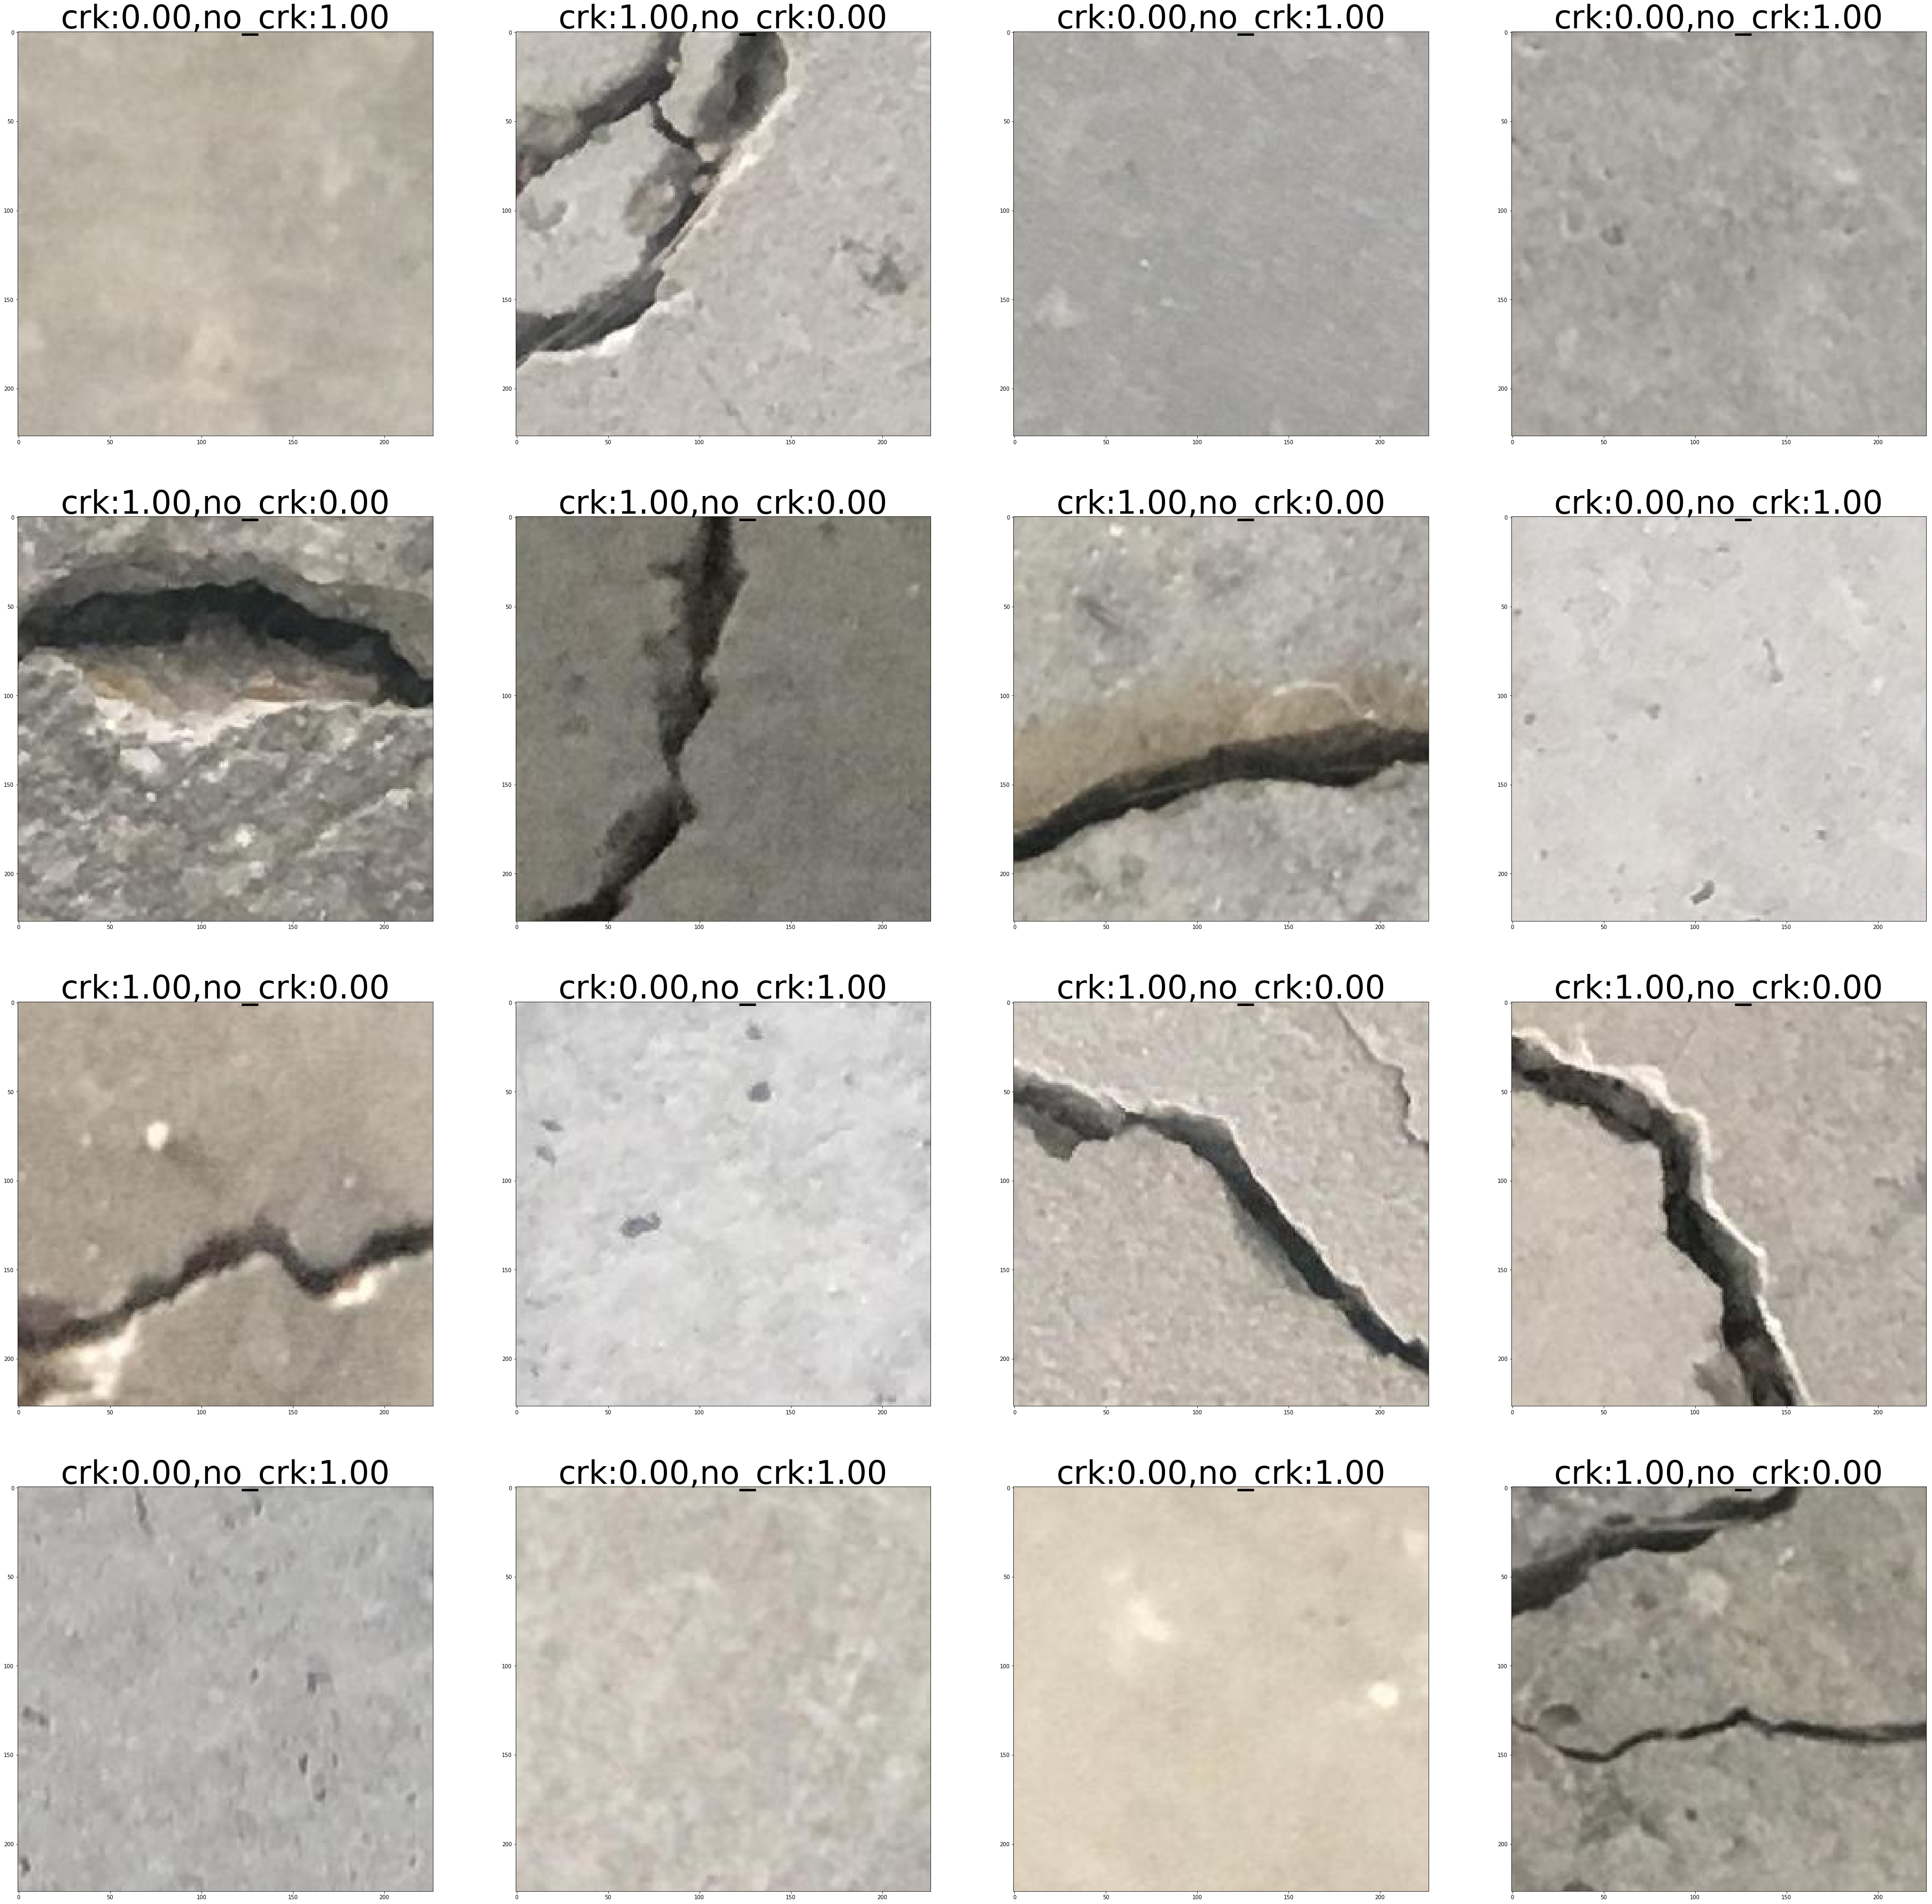

In [20]:
fig=plt.figure(figsize=(64, 64))
n_columns = 4
n_rows = N_TEST_IMAGES/n_columns
i = 1
for img_filename in image_files:    
    img = cv2.imread(img_filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig.add_subplot(n_rows, n_columns, i)
    plt.imshow(img, interpolation='nearest', aspect='auto')
    
    pred = cnn.predict_image_file(img_filename)    
    plt.title("crk:%0.2f,no_crk:%0.2f" % (pred[0][1],pred[0][0]), fontsize=60)
    i = i + 1
plt.show()